In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# !pip install tsfresh

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/model_data.csv")

In [ ]:
dataframe.head(50)

,language,sex,category,age,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],C4[6],...,T5[15],T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24]
0,1,1,1,44,-0.714286,0.555556,-1.190476,2.301587,0.396825,0.079365,...,1.507937,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
1,1,1,1,44,0.317460,1.507937,-0.238095,1.031746,-0.158730,0.396825,...,0.873016,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
2,1,1,1,44,-1.507937,0.238095,-0.714286,1.666667,0.476190,1.507937,...,1.746032,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
3,1,1,1,44,-0.714286,0.873016,-0.396825,1.031746,0.079365,0.714286,...,1.666667,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
4,1,1,1,44,-15.317460,-15.158730,-21.825397,-63.650794,-23.333333,-10.873016,...,-8.809524,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619
5,1,1,1,44,-11.746032,21.587302,-35.873016,-19.047619,-25.952381,15.873016,...,-8.095238,-3.888889,-55.476190,-11.984127,24.126984,-40.793651,-39.603175,-2.380952,-0.714286,-244.047619
6,1,1,1,44,-13.730159,22.301587,-10.952381,2.698413,-16.666667,31.984127,...,-15.952381,-13.333333,-25.793651,-16.666667,27.301587,-10.793651,-12.777778,0.396825,-0.158730,-244.047619
7,1,1,1,44,-21.111111,-11.904762,-31.190476,-28.412698,-30.793651,-14.047619,...,-27.063492,-25.714286,-45.000000,-19.047619,-9.444444,-28.174603,-33.174603,-1.111111,0.476190,-244.047619
8,1,1,1,44,0.714286,-0.238095,-0.555556,2.460317,-0.555556,-0.396825,...,-1.190476,15.000000,0.952381,6.587302,-1.984127,5.000000,1.031746,-2.142857,-1.190476,-244.047619
9,1,1,1,44,1.825397,-0.079365,0.714286,4.206349,0.476190,0.317460,...,-1.507937,7.460317,-0.793651,9.285714,-4.206349,3.412698,1.746032,-1.904762,-1.349206,-244.047619


In [ ]:
dataframe.describe()

,language,sex,category,age,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],C4[6],...,T5[15],T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24]
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,...,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0.783673,0.465306,0.489796,39.036735,-1.459346,5.394882,0.853580,6.018788,-7.054422,-0.893748,...,-5.976676,0.935860,2.204082,-4.569161,-33.464529,-38.418529,-33.834467,-36.762877,-37.135407,-234.977324
std,0.412582,0.499816,0.500919,13.391132,38.349427,27.441076,32.257963,25.211125,34.540467,20.347620,...,25.664116,32.332780,37.610187,23.627818,108.176285,106.263537,107.472372,103.801042,103.635586,25.302322
min,0.000000,0.000000,0.000000,20.000000,-112.380952,-100.555556,-91.269841,-63.650794,-160.476190,-110.079365,...,-156.746032,-165.238095,-186.984127,-128.571429,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-244.047619
25%,1.000000,0.000000,0.000000,27.000000,-15.317460,-2.619048,-9.523810,-2.460317,-17.460317,-5.952381,...,-14.047619,-7.619048,-9.047619,-8.730159,-8.650794,-24.365079,-13.174603,-0.396825,-0.634921,-244.047619
50%,1.000000,0.000000,0.000000,39.000000,-1.190476,0.555556,-0.079365,0.714286,-0.476190,-0.079365,...,0.238095,-0.079365,-1.349206,0.238095,0.555556,-1.507937,-0.079365,-0.238095,-0.396825,-244.047619
75%,1.000000,1.000000,1.000000,47.000000,5.000000,11.349206,7.460317,10.476190,3.968254,3.968254,...,3.968254,6.111111,12.142857,3.412698,7.539683,6.984127,14.444444,0.317460,-0.079365,-244.047619
max,1.000000,1.000000,1.000000,74.000000,179.523810,180.873016,230.873016,165.158730,172.936508,83.809524,...,56.031746,223.571429,174.603175,111.825397,200.634921,93.809524,108.412698,42.460317,20.952381,-164.682540


In [ ]:
time = [0.24 + 0.24 * i for i in range(245)]
# the time feature was evaluated using the sampling rate of 1024Hz of the employed sampling device
# 0.24 = 245 samples * 1s / 1024 samples

In [ ]:
# Convert the list of numbers to a pandas Series
series = pd.Series(time)

# Add the Series as a new column to the existing DataFrame
dataframe['Time'] = series

In [ ]:
timeseries = dataframe.iloc[:, 5:]

In [ ]:
timeseries.head()

,Fp2[2],F3[3],F4[4],C3[5],C4[6],P3[7],P4[8],O1[9],O2[10],F7[11],...,T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24],Time
0,0.555556,-1.190476,2.301587,0.396825,0.079365,-0.555556,0.079365,0.238095,0.714286,1.190476,...,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,0.24
1,1.507937,-0.238095,1.031746,-0.158730,0.396825,-0.555556,-1.031746,-0.396825,-1.031746,2.301587,...,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,0.48
2,0.238095,-0.714286,1.666667,0.476190,1.507937,0.396825,1.190476,1.507937,1.507937,0.873016,...,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,0.72
3,0.873016,-0.396825,1.031746,0.079365,0.714286,0.079365,0.079365,0.555556,0.238095,1.825397,...,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,0.96
4,-15.158730,-21.825397,-63.650794,-23.333333,-10.873016,-24.603175,-1.904762,-10.873016,18.730159,-10.317460,...,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619,1.20


In [ ]:
# Drop the last column
timeseries = timeseries.iloc[:, :-1]
timeseries.head()

,Fp2[2],F3[3],F4[4],C3[5],C4[6],P3[7],P4[8],O1[9],O2[10],F7[11],...,T5[15],T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24]
0,0.555556,-1.190476,2.301587,0.396825,0.079365,-0.555556,0.079365,0.238095,0.714286,1.190476,...,1.507937,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
1,1.507937,-0.238095,1.031746,-0.158730,0.396825,-0.555556,-1.031746,-0.396825,-1.031746,2.301587,...,0.873016,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
2,0.238095,-0.714286,1.666667,0.476190,1.507937,0.396825,1.190476,1.507937,1.507937,0.873016,...,1.746032,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
3,0.873016,-0.396825,1.031746,0.079365,0.714286,0.079365,0.079365,0.555556,0.238095,1.825397,...,1.666667,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
4,-15.158730,-21.825397,-63.650794,-23.333333,-10.873016,-24.603175,-1.904762,-10.873016,18.730159,-10.317460,...,-8.809524,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619


In [ ]:
feature_names = timeseries.columns.tolist()
feature_names

['Fp2[2]',
 'F3[3]',
 'F4[4]',
 'C3[5]',
 'C4[6]',
 'P3[7]',
 'P4[8]',
 'O1[9]',
 'O2[10]',
 'F7[11]',
 'F8[12]',
 'T3[13]',
 'T4[14]',
 'T5[15]',
 'T6[16]',
 'Fz[17]',
 'Pz[18]',
 'Cz[19]',
 'Pg1[20]',
 'Pg2[21]',
 'EOGR[22]',
 'EOOGL[23]',
 'EMG[24]']

In [ ]:
timeseries.iloc[3]

Fp2[2]         0.873016
F3[3]         -0.396825
F4[4]          1.031746
C3[5]          0.079365
C4[6]          0.714286
P3[7]          0.079365
P4[8]          0.079365
O1[9]          0.555556
O2[10]         0.238095
F7[11]         1.825397
F8[12]         1.825397
T3[13]        -0.555556
T4[14]        -1.507937
T5[15]         1.666667
T6[16]        -0.714286
Fz[17]        -3.095238
Pz[18]         0.873016
Cz[19]      -325.000000
Pg1[20]     -325.000000
Pg2[21]     -325.000000
EOGR[22]    -325.000000
EOOGL[23]   -325.000000
EMG[24]     -164.682540
Name: 3, dtype: float64

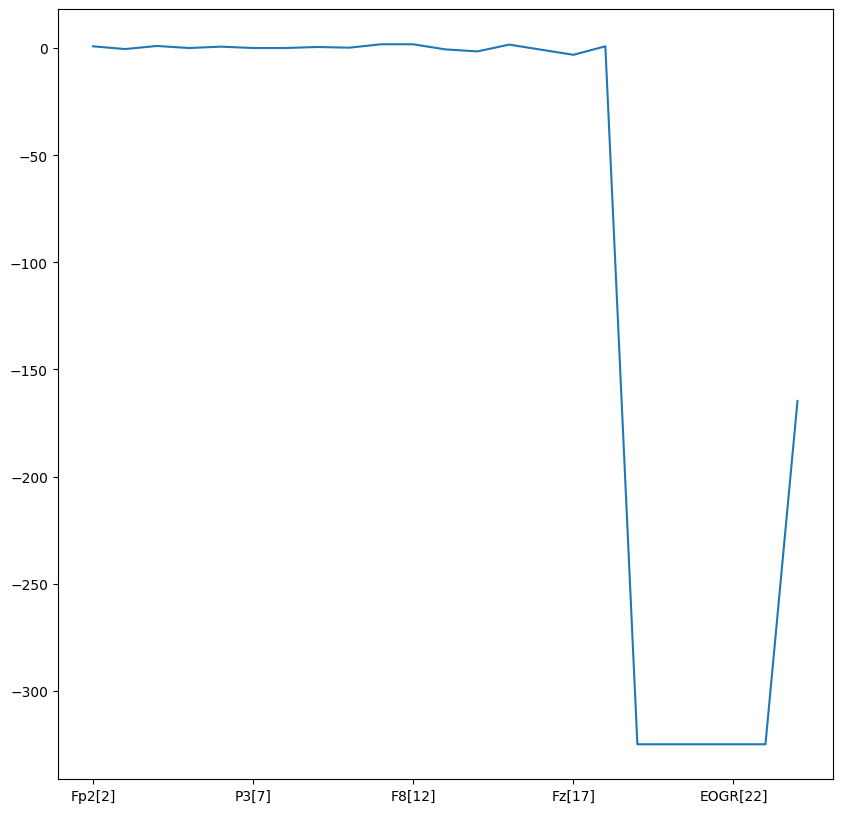

In [ ]:
timeseries.iloc[3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

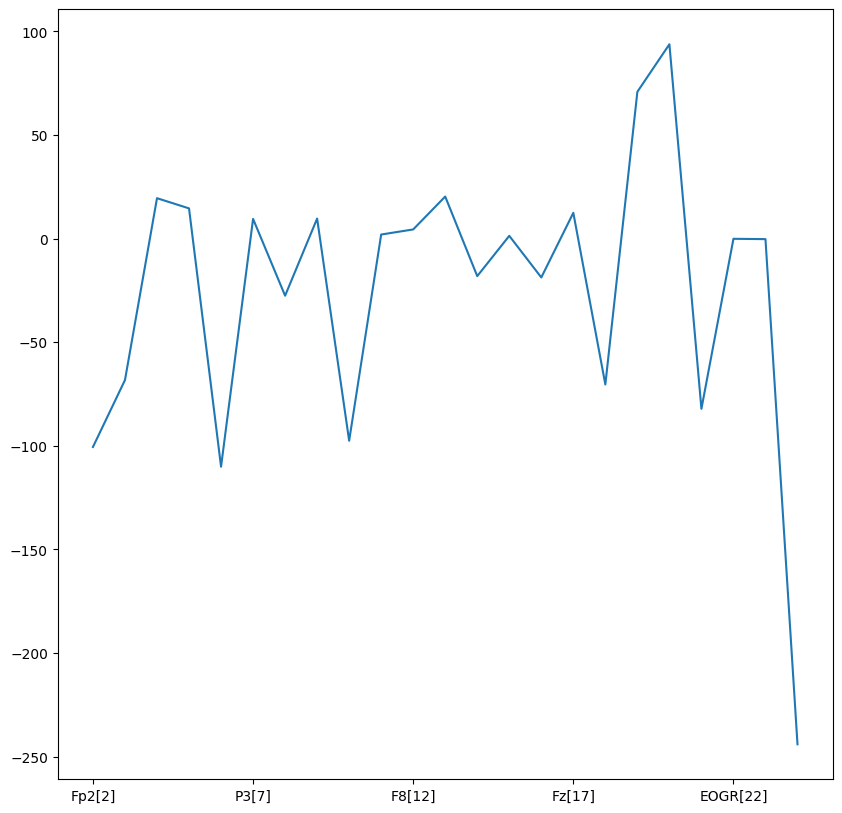

In [ ]:
timeseries.iloc[16].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

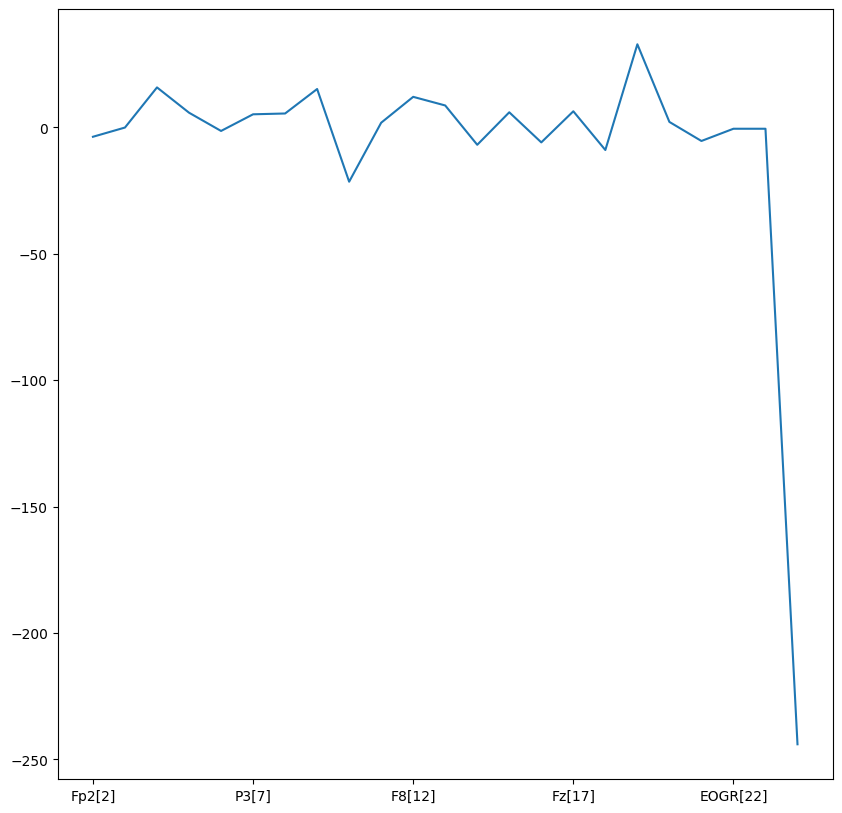

In [ ]:
timeseries.iloc[17].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

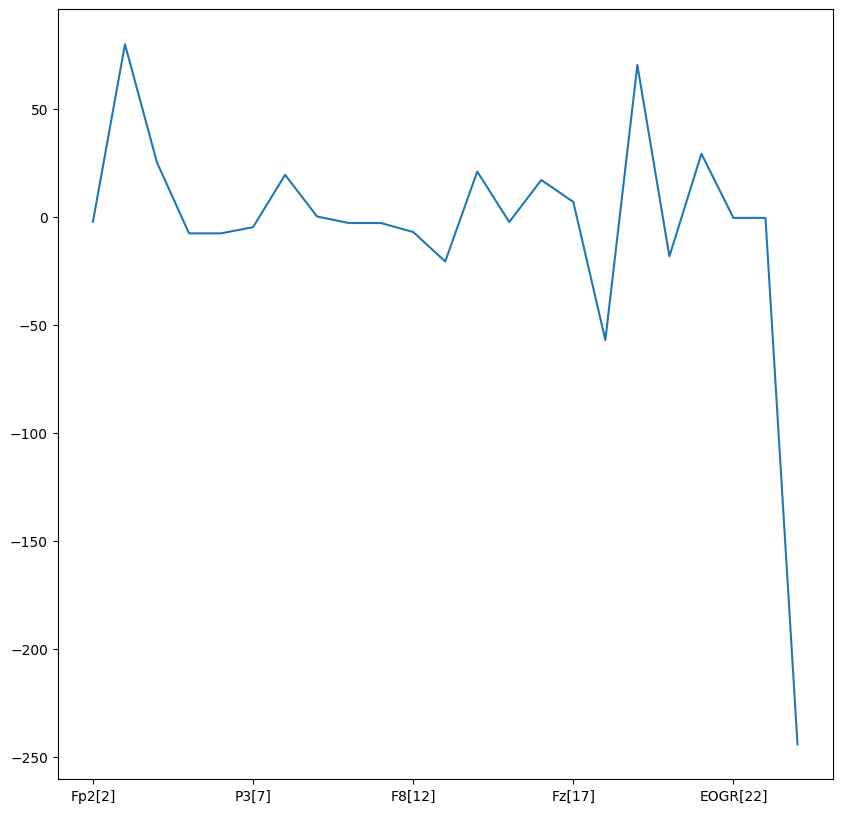

In [ ]:
timeseries.iloc[18].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

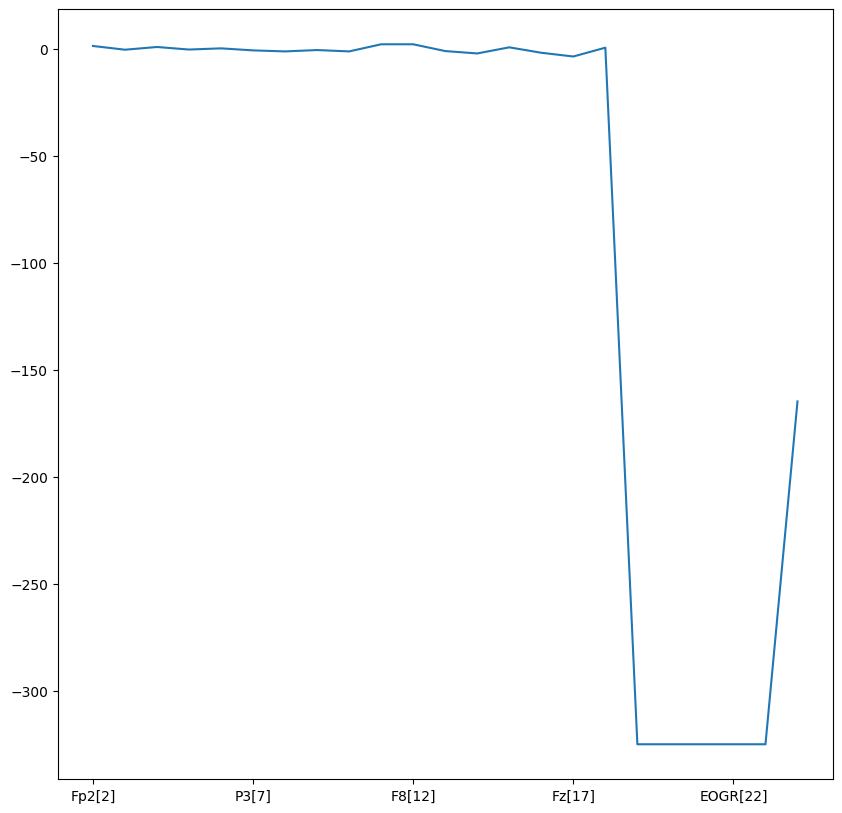

In [ ]:
timeseries.iloc[1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

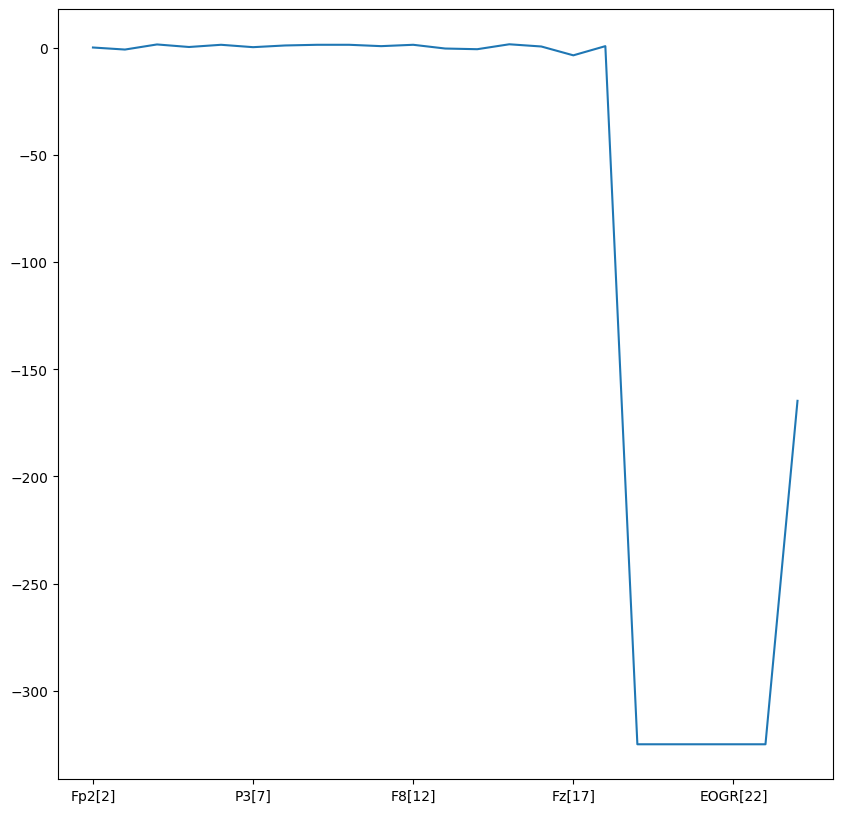

In [ ]:
timeseries.iloc[2].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [ ]:
timeseries.iloc[16]

Fp2[2]      -100.555556
F3[3]        -68.253968
F4[4]         19.523810
C3[5]         14.603175
C4[6]       -110.079365
P3[7]          9.523810
P4[8]        -27.539683
O1[9]          9.682540
O2[10]       -97.539683
F7[11]         1.984127
F8[12]         4.444444
T3[13]        20.317460
T4[14]       -18.095238
T5[15]         1.349206
T6[16]       -18.730159
Fz[17]        12.460317
Pz[18]       -70.396825
Cz[19]        70.873016
Pg1[20]       93.809524
Pg2[21]      -82.142857
EOGR[22]      -0.079365
EOOGL[23]     -0.238095
EMG[24]     -244.047619
Name: 16, dtype: float64

In [ ]:
# It can be observed that the control and healthy patients have differerent shapes of plot
# It can be further observed that there are outliers in the data of the two categories there the plot only covers very few electrodes
# The effect of the outlier can be eradicated by standardization

In [ ]:
scaler = StandardScaler()
timeseries = scaler.fit_transform(timeseries)

In [ ]:
type(timeseries)

numpy.ndarray

In [ ]:
timeseries[0]

array([-0.17671438, -0.06349564, -0.14774472,  0.21616675,  0.04792232,
        0.15982541, -0.16490845,  0.27099271, -0.10438519, -0.03393986,
        0.00632397,  0.103149  , -0.07223598,  0.29223429, -0.01178627,
       -0.14118962,  0.23080072, -2.70052044, -2.70241453, -2.71475886,
       -2.78250743, -2.78334776,  2.78388218])

In [ ]:
# plot the same set of graphs again

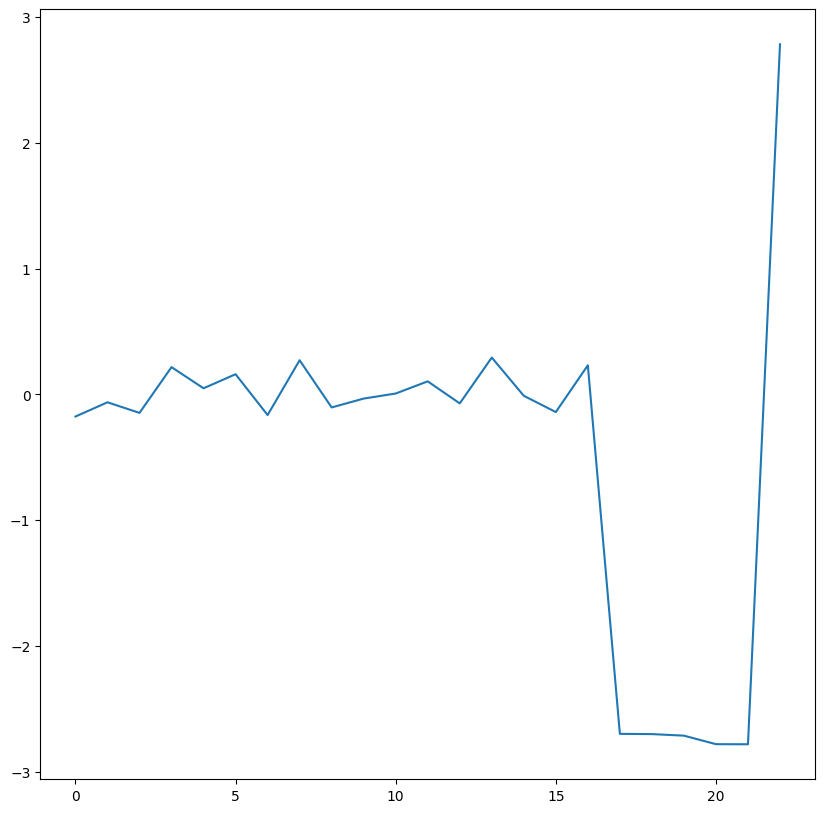

In [ ]:

pd.Series(timeseries[0]).plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [ ]:
# It can be noted that the plot now covers indexes 0 to 23 which corresponds to the 23 electrodes we had initially before standardization
# It can

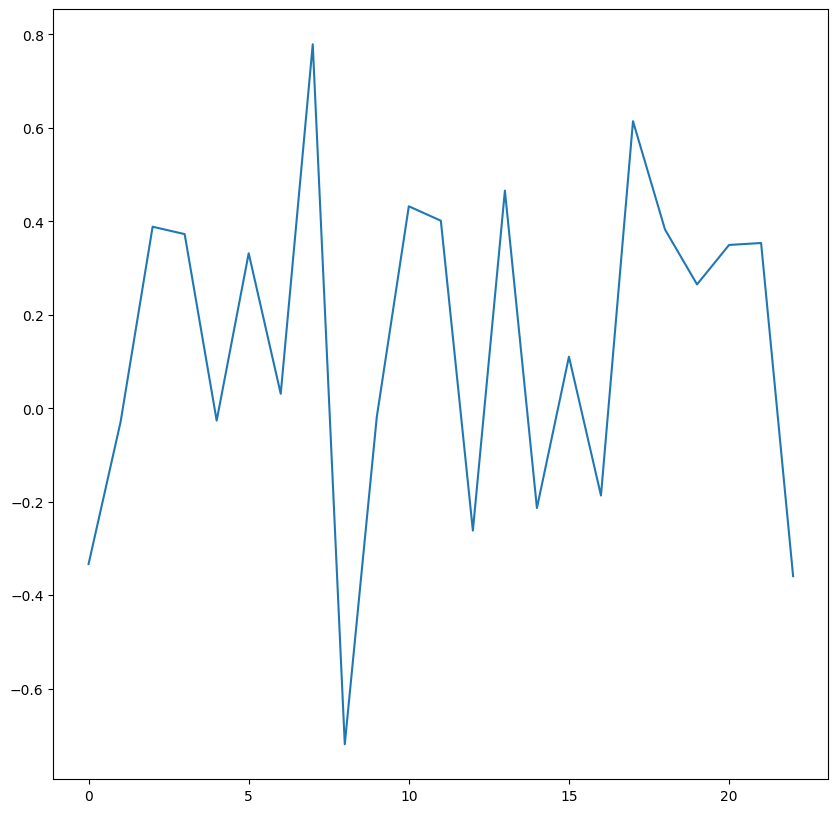

In [ ]:
pd.Series(timeseries[17]).plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

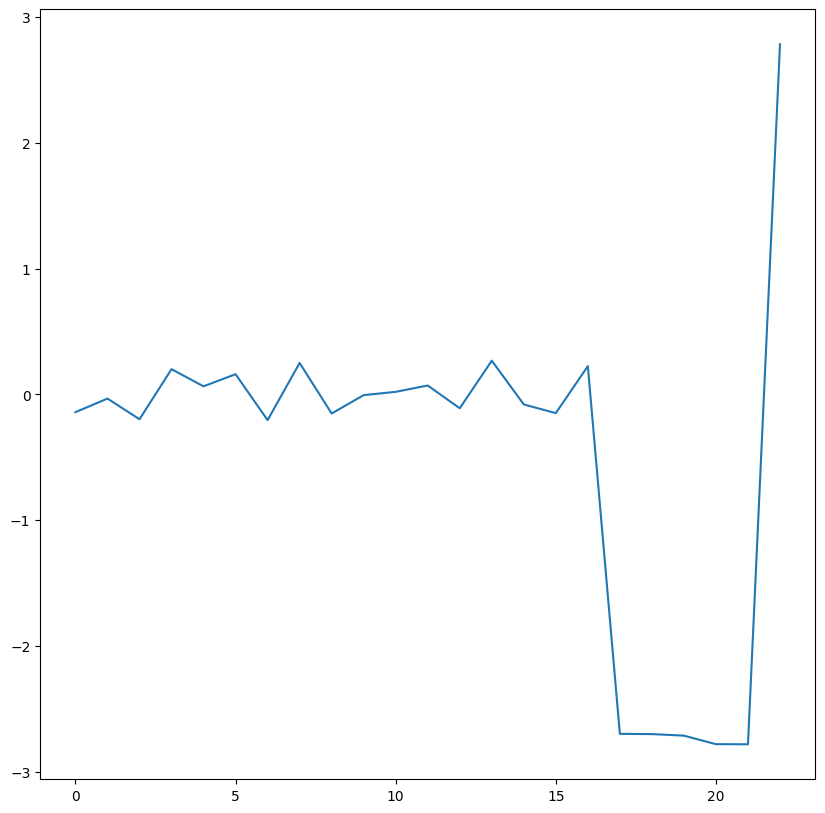

In [ ]:
pd.Series(timeseries[1]).plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

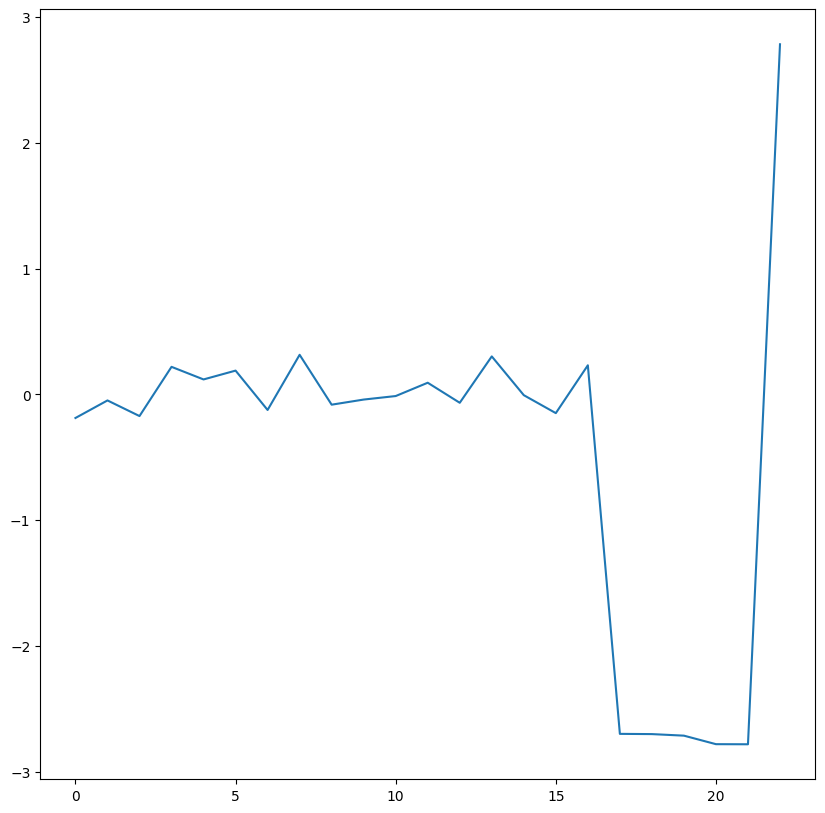

In [ ]:
pd.Series(timeseries[2]).plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

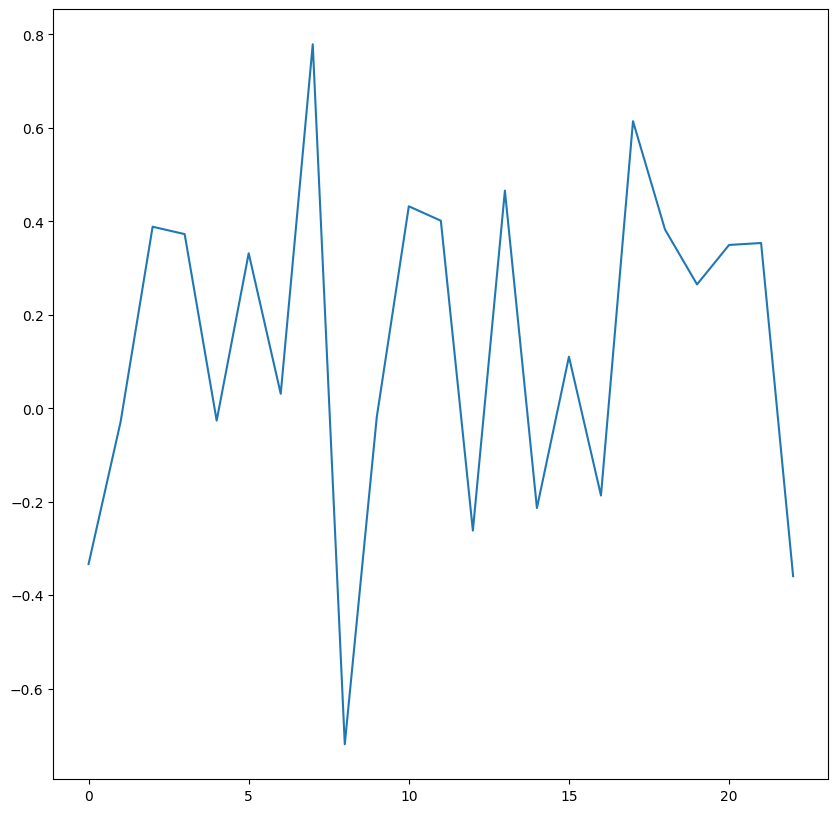

In [ ]:
pd.Series(timeseries[17]).plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [ ]:
# It can be observed that the control plots have the same shape while the healthy plots have the same shape
# Since these plots are representative of all the electrodes, standardization is likely a good scaler and has the potential of giving higher classification accuracy with deep neural network

In [ ]:
timeseries

array([[-0.17671438, -0.06349564, -0.14774472, ..., -2.78250743,
        -2.78334776,  2.78388218],
       [-0.14193693, -0.0339113 , -0.19821612, ..., -2.78250743,
        -2.78334776,  2.78388218],
       [-0.18830686, -0.04870347, -0.17298042, ..., -2.78250743,
        -2.78334776,  2.78388218],
       ...,
       [-0.23757491,  0.66625142, -0.21083397, ...,  0.35259329,
         0.35215392, -0.3592106 ],
       [ 0.09570895, -0.35194296, -0.05626531, ...,  0.33114099,
         0.34141065, -0.3592106 ],
       [-0.01441963,  0.38766555,  0.00366948, ...,  0.36331944,
         0.36136244, -0.3592106 ]])

In [ ]:
from tsfresh import extract_relevant_features

y = dataframe['category']
timeseries = pd.DataFrame(timeseries, columns=feature_names)
timeseries['time'] = series
timeseries['id'] = pd.Series(list(range(246)))

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction:  29%|██▉       | 1621/5635 [01:19<03:16, 20.44it/s]


KeyboardInterrupt: 

In [ ]:
features_filtered_direct

In [ ]:
features_filtered_direct.to_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Features/relevant_timeseries_features.csv", index=False)

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Features/relevant_timeseries_features.csv")

In [4]:
df.head()

,EOOGL[23]__benford_correlation,Pg1[20]__range_count__max_1__min_-1,EOGR[22]__benford_correlation,Pg1[20]__root_mean_square,Pg1[20]__absolute_maximum,"Pg1[20]__fft_coefficient__attr_""abs""__coeff_0",Pg1[20]__abs_energy,Cz[19]__count_below__t_0,Cz[19]__range_count__max_1000000000000.0__min_0,Cz[19]__range_count__max_0__min_-1000000000000.0,...,EMG[24]__maximum,EMG[24]__absolute_maximum,EMG[24]__minimum,EMG[24]__benford_correlation,EMG[24]__root_mean_square,EMG[24]__quantile__q_0.2,EMG[24]__quantile__q_0.3,EMG[24]__quantile__q_0.4,EMG[24]__quantile__q_0.1,Pg2[21]__range_count__max_1__min_-1
0,0.295657,0.0,0.295657,2.702415,2.702415,2.702415,7.303044,1.0,0.0,1.0,...,2.783882,2.783882,2.783882,0.295657,2.783882,2.783882,2.783882,2.783882,2.783882,0.0
1,0.295657,0.0,0.295657,2.702415,2.702415,2.702415,7.303044,1.0,0.0,1.0,...,2.783882,2.783882,2.783882,0.295657,2.783882,2.783882,2.783882,2.783882,2.783882,0.0
2,0.295657,0.0,0.295657,2.702415,2.702415,2.702415,7.303044,1.0,0.0,1.0,...,2.783882,2.783882,2.783882,0.295657,2.783882,2.783882,2.783882,2.783882,2.783882,0.0
3,0.295657,0.0,0.295657,2.702415,2.702415,2.702415,7.303044,1.0,0.0,1.0,...,2.783882,2.783882,2.783882,0.295657,2.783882,2.783882,2.783882,2.783882,2.783882,0.0
4,0.062915,1.0,0.062915,0.184161,0.184161,0.184161,0.033915,0.0,1.0,0.0,...,-0.359211,0.359211,-0.359211,0.062915,0.359211,-0.359211,-0.359211,-0.359211,-0.359211,1.0


In [ ]:
y.to_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/labels.csv", index=False)

In [ ]:
eeg_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/eeg_data.csv")
info_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/participants_info.csv")

In [ ]:
eeg_data.head()

,Unnamed: 0,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],C4[6],P3[7],P4[8],O1[9],...,T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24],ParticipantID
0,0,-0.714286,0.555556,-1.190476,2.301587,0.396825,0.079365,-0.555556,0.079365,0.238095,...,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
1,1,0.317460,1.507937,-0.238095,1.031746,-0.158730,0.396825,-0.555556,-1.031746,-0.396825,...,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
2,2,-1.507937,0.238095,-0.714286,1.666667,0.476190,1.507937,0.396825,1.190476,1.507937,...,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
3,3,-0.714286,0.873016,-0.396825,1.031746,0.079365,0.714286,0.079365,0.079365,0.555556,...,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
4,4,-15.317460,-15.158730,-21.825397,-63.650794,-23.333333,-10.873016,-24.603175,-1.904762,-10.873016,...,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619,1


In [ ]:
info_df.head()

,Unnamed: 0,language,firstname,Date of Birth,ParticipantID,surname,sex,lastSessionID,category,age
0,0,English,Danladi,11-11-1960,1,Bako,M,30,Control,44
1,1,English,Kehinde,11-01-1949,10,AYENI,F,3,Patient,74
2,2,Yoruba,Aisha,29-04-2000,11,BABALOLA,F,3,Control,22
3,3,English,Ayooluwatomiwa,04-02-1994,12,ALO,F,6,Control,28
4,4,English,Kehinde,19-11-1999,13,AYODELE,F,2,Control,23


In [ ]:
info_df['ParticipantID']

0      1
1     10
2     11
3     12
4     13
5     14
6     15
7     16
8     17
9     18
10    19
11     2
12    20
13    21
14    22
15    23
16    24
17    25
18    26
19    27
20    28
21    29
22     3
23    30
24    31
25     4
26     5
27     6
28     7
29     8
30     9
Name: ParticipantID, dtype: int64